In [1]:
!pip3 install wordcloud

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('E:\\Sentiment.csv',encoding="unicode_escape")
data = data[['text','sentiment']]

In [6]:
train, test = train_test_split(data,test_size = 0.1)

In [7]:
train = train[train.sentiment != "Neutral"]

In [8]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

In [9]:

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


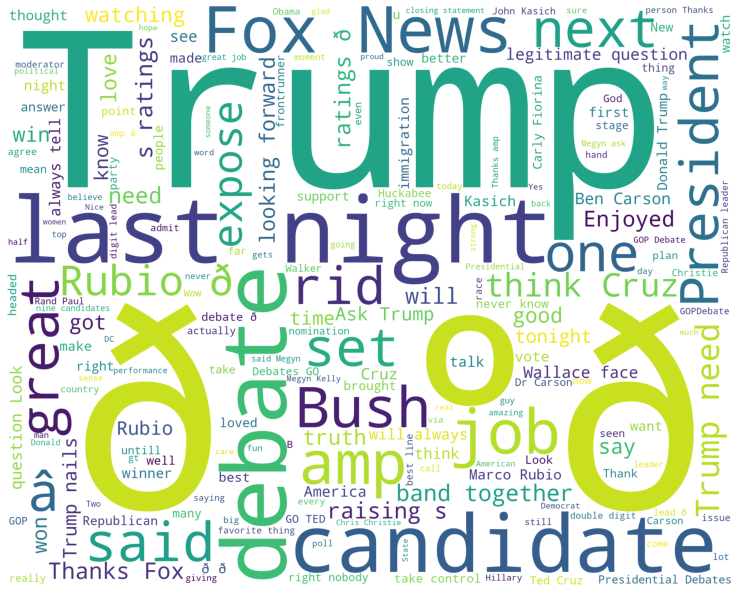

Negative words


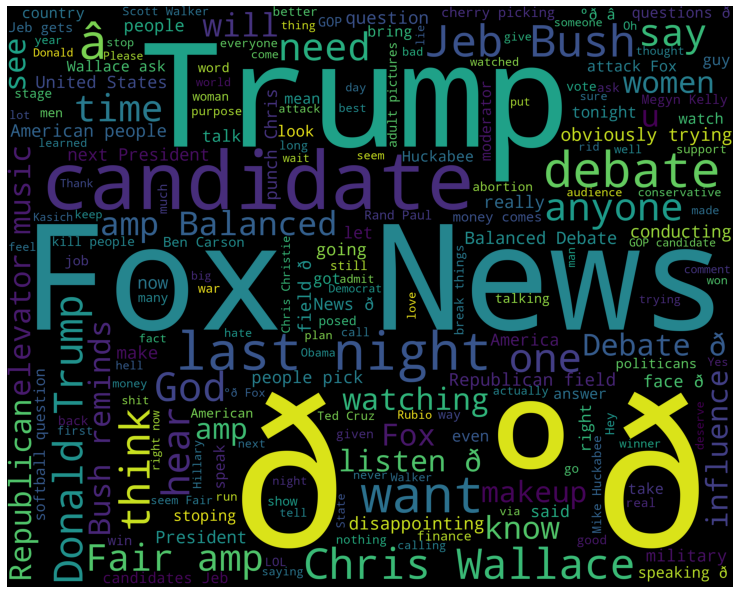

In [10]:
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Interesting to notice the following words and expressions in the positive word set: truth, strong, legitimate, together, love, job

In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.

At the same time, negative tweets contains words like: influence, news, elevator music, disappointing, softball, makeup, cherry picking, trying

In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.

Stop Word: Stop Words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )



In [11]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [12]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

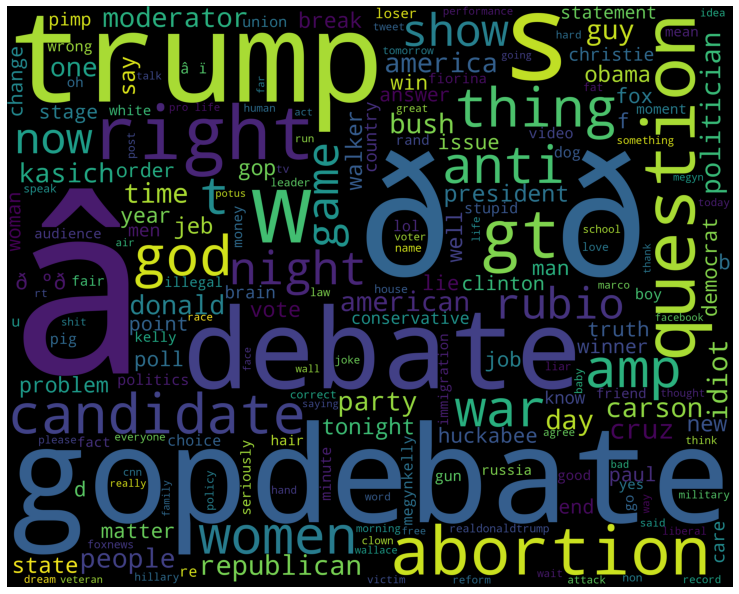

In [13]:
wordcloud_draw(w_features)

In [14]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [15]:
training_set 

[({'contains(contrary)': True, "contains(trump's)": True, 'contains(views,)': True, 'contains(fox)': True, 'contains(news)': True, 'contains(debate)': True, 'contains(moderators)': True, 'contains(brilliant)': True, 'contains(form)': True, 'contains(last)': True, 'contains(night.)': True, 'contains(man)': False, 'contains(uses)': False, 'contains(brain)': False, 'contains(think,not)': False, 'contains(politically)': False, 'contains(manipulate,i)': False, 'contains(hope)': False, 'contains(goes)': False, 'contains(far,id)': False, 'contains(like)': False, 'contains(see/hear)': False, 'contains(frm)': False, 'contains(him.)': False, 'contains(bushs...)': False, 'contains(fuck)': False, 'contains(jeb)': False, 'contains(definitely)': False, 'contains(need)': False, 'contains(new)': False, 'contains(tax)': False, 'contains(system.)': False, 'contains(must)': False, 'contains(admire)': False, 'contains(asking)': False, 'contains(tough)': False, 'contains(questions)': False, 'contains(candi

In [16]:
classifier 

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt)) 

Epilog
In this project I was curious how well nltk and the NaiveBayes Machine Learning algorithm performs for Sentiment Analysis. In my experience, it works rather well for negative comments. The problems arise when the tweets are ironic, sarcastic has reference or own difficult context.

Consider the following tweet: "Muhaha, how sad that the Liberals couldn't destroy Trump. Marching forward." As you may already thought, the words sad and destroy highly influences the evaluation, although this tweet should be positive when observing its meaning and context.

To improve the evalutation accuracy, we need something to take the context and references into consideration. As my project 2.0, I will try to build an LSTM network, and benchmark its results compared to this nltk Machine Learning implementation. Stay tuned.